# SVM for classification

Load IRIS dataset, check its contents:


In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [3]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [4]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [5]:
pickX = iris.data[:,0:2]
print(pickX.shape)

(150, 2)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

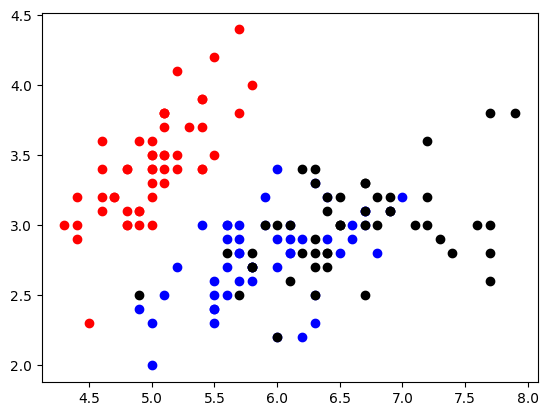

In [6]:
import matplotlib.pyplot as plt 
plt.scatter(pickX[y==0,0], pickX[y==0,1], color='red', marker='o')
plt.scatter(pickX[y==1,0], pickX[y==1,1], color='blue', marker='o')
plt.scatter(pickX[y==2,0], pickX[y==2,1], color='black', marker='o')

In [7]:
#Training and testing with only 2 features
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target

# Select the first two columns of X
X = X[:, 0:2]

# Create a mask to filter out rows where Y == 2
mask = y != 2  # Keep rows where Y is NOT equal to 2

# Apply the mask to X and Y
X_filtered = X[mask]
Y_filtered = y[mask]
X_train, X_test, y_train, y_test = train_test_split(X_filtered,Y_filtered,test_size=0.2)
#decimate the data two only two collums and two classes

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train)
print(y_test)

(80, 2)
(20, 2)
(80,)
(20,)
[0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0
 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0
 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0]


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

1.0


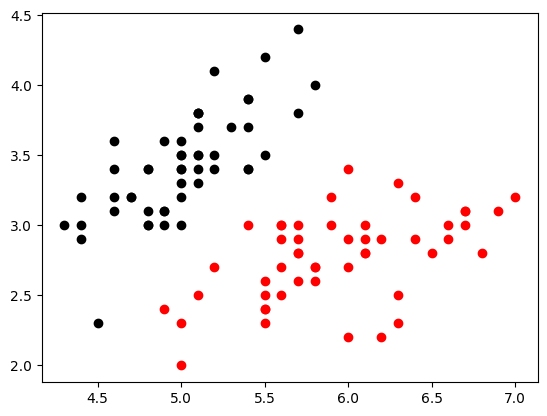

In [8]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear', C=200)
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
print(SVMmodel.score(X_test,y_test))

#scatter plot only two iris classes
plt.scatter(X_filtered[Y_filtered==0,0], X_filtered[Y_filtered==0,1], color='black')
plt.scatter(X_filtered[Y_filtered==1,0], X_filtered[Y_filtered==1,1], color='red')

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

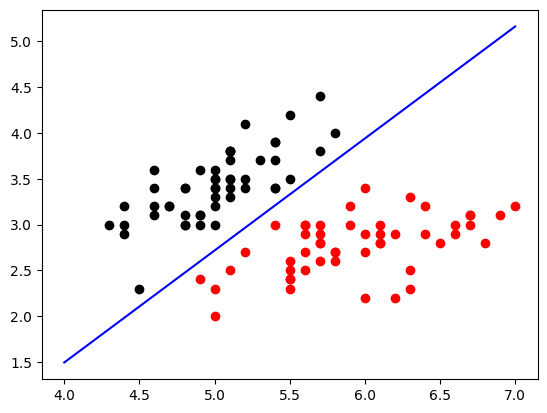

In [9]:
import numpy as np
supvectors=SVMmodel.support_vectors_

#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_

# Plot the support vectors here
supportVectorX0 = np.linspace(4, 7, 100)
supportVectorX1 = - (W[0, 0] / W[0, 1]) * supportVectorX0 - (b / W[0, 1])

plt.scatter(X_filtered[Y_filtered==0,0], X_filtered[Y_filtered==0,1], color='black')
plt.scatter(X_filtered[Y_filtered==1,0], X_filtered[Y_filtered==1,1], color='red')
plt.plot(supportVectorX0, supportVectorX1, color='blue')


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

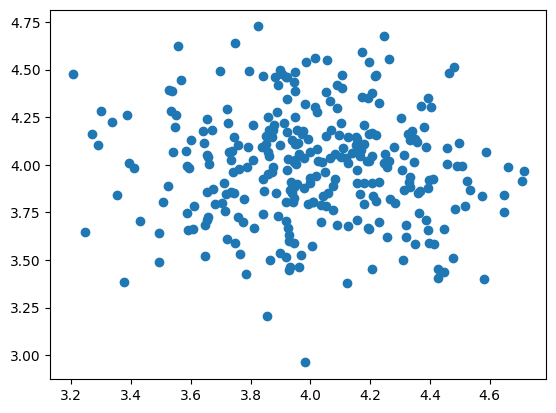

In [10]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()


Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

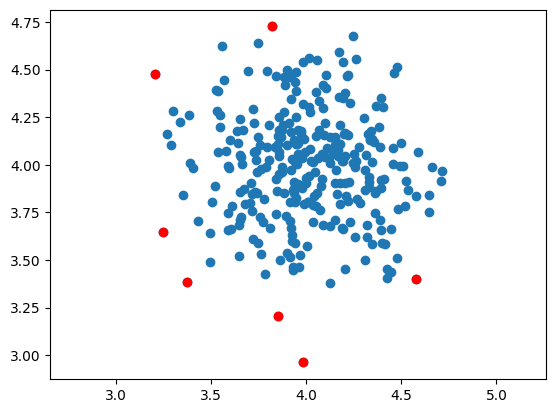

In [11]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

C:\Users\slava\AppData\Local\Temp\ipykernel_26400\11994387.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', label="Decision Boundary")


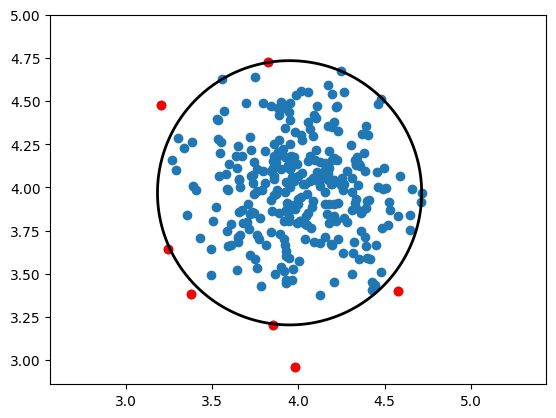

In [ ]:
xx, yy = np.meshgrid(np.linspace(3, 5 , 500), np.linspace(3, 5 , 500))


Z = SVMmodelOne.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')


plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', label="Decision Boundary")
plt.axis('equal')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


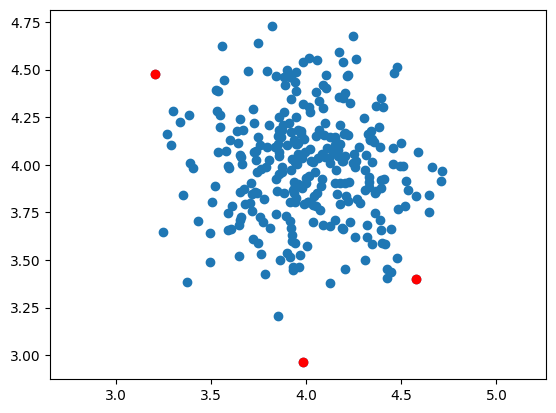

In [13]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()